## Transmission Lines

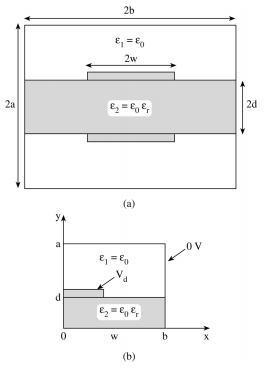

#### ref : http://inis.jinr.ru/sl/Simulation/Sadiku,_Numerical_Techniques_in_Electromagnetics,2001.pdf

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [70]:
b = 1.
a = 1.
d = 0.4
d2 = 0.08
w = 0.4
NX_DIV = 100  # X軸方向のメッシュ分割数
NY_DIV = 100  # Y軸方向のメッシュ分割数
DX = b / NX_DIV
DY = a / NY_DIV

In [71]:
v = np.ones([NX_DIV+1, NY_DIV+1])

## 誘電率定義

In [72]:
EPS_0 = 1.
EPS_R = 1.4
DC = np.ones([NX_DIV+1, NY_DIV+1]) * EPS_0
DC[:, :int(NY_DIV*(d/a))] = EPS_0*EPS_R
DC[:int(NY_DIV*(w/b)), :int(NY_DIV*((d+d2)/a))] = EPS_0*EPS_R

In [73]:
X1, X2 = np.meshgrid(np.linspace(0, b, NX_DIV+1) , np.linspace(0, a, NY_DIV+1))

c:\users\user\appdata\local\programs\python\python35\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


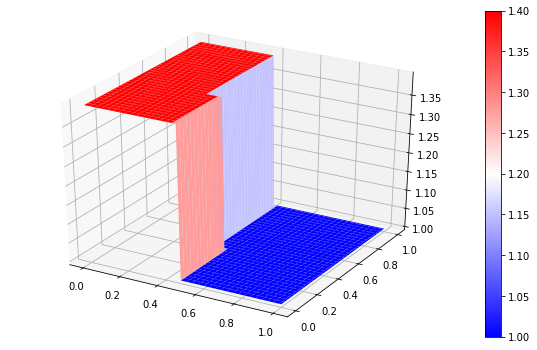

In [74]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X1, X2, DC, cmap='bwr', linewidth=0)
fig.colorbar(surf)
fig.show()

## 格子点の区分(境界等)定義

In [75]:
def get_type(i, j):
    """インデックス(i, j)から境界等の区分を返す
    
    Returns:
        idx (int): 区分
            0. 誘電体と非誘電体間の境界
            1. line of symmetry (x軸上)
            2. line of symmetry (y軸上)
            3. 外側の境界
            4. 誘電体内部 or 非誘電体内部
    """
    if i == NX_DIV or j == NY_DIV:
        return 3
    elif j == 0:
        return 1
    elif i == 0:
        return 2
    elif (i <= int(NY_DIV*(w/b)) and j == int(NY_DIV*((d+d2)/a))) \
            or (i > int(NY_DIV*(w/b)) and j == int(NY_DIV*(d/a))) \
            or (i == int(NY_DIV*(w/b)) and j >= int(NY_DIV*(d/a)) and j <= int(NY_DIV*((d+d2)/a))):
        return 0
    else:
        return 4

## 電圧計算

In [78]:
N_ITER = 5000
v = np.ones([NX_DIV+1, NY_DIV+1])

for n in range(N_ITER):
    if n % 100 == 0:
        print(n)
    v_next = np.zeros([NX_DIV+1, NY_DIV+1])
    for i in range(v.shape[0]):
        for j in range(v.shape[1]):
            t = get_type(i, j)
            if t == 0:
                v_next[i, j] = DC[i, j+1] / (2. * (DC[i, j+1] + DC[i, j-1])) * v[i, j+1] \
                                + DC[i, j-1] / (2. * (DC[i, j+1] + DC[i, j-1])) * v[i, j-1] \
                                + (1/4) * v[i-1, j] \
                                + (1/4) * v[i+1, j]
            elif t == 1:
                v_next[i, j] = (1/4) * (2*v[i, 1] + v[i-1, 0] + v[i+1, 0])
            elif t == 2:
                v_next[i, j] = (1/4) * (v[0, j+1] + v[0, j-1] + 2*v[1, j])
            elif t == 3:
                v_next[i, j] = 0.
            elif t == 4:
                v_next[i, j] = (1/4) * (v[i, j+1] + v[i-1, j] + v[i, j-1] + v[i+1, j])
            else:
                raise ValueError('type invalid')
    v = v_next.copy()

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900


c:\users\user\appdata\local\programs\python\python35\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


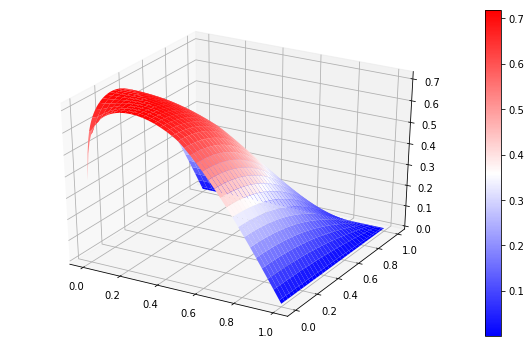

In [79]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X1, X2, v, cmap='bwr', linewidth=0)
fig.colorbar(surf)
fig.show()

In [90]:
v2 = np.zeros([(NX_DIV+1)*2, (NY_DIV+1)*2])

In [91]:
v2[:(NX_DIV+1), :(NY_DIV+1)] = v[::-1, ::-1]
v2[(NX_DIV+1):, (NY_DIV+1):] = v[:, :]
v2[:(NX_DIV+1), (NY_DIV+1):] = v[::-1, :]
v2[(NX_DIV+1):, :(NY_DIV+1)] = v[:, ::-1]

c:\users\user\appdata\local\programs\python\python35\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


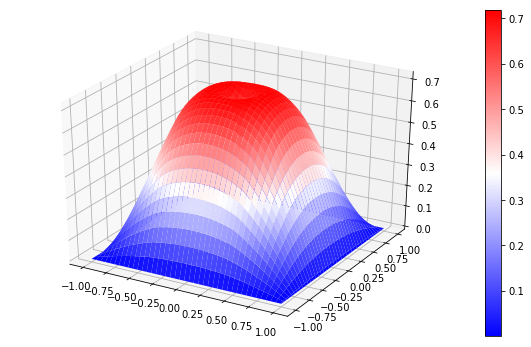

In [92]:
X1, X2 = np.meshgrid(np.linspace(-b, b, (NX_DIV+1)*2) , np.linspace(-a, a, (NY_DIV+1)*2))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X1, X2, v2, cmap='bwr', linewidth=0)
fig.colorbar(surf)
fig.show()